
#Bejgam Pranav
#E22CSEU1196
#B-40


Task 1

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from scipy import ndimage

In [9]:
image_path = '/content/photo-1493238792000-8113da705763.jpeg'
img = cv2.imread(image_path)

In [10]:
type(img)

numpy.ndarray

In [11]:
img.shape

(2002, 3000, 3)

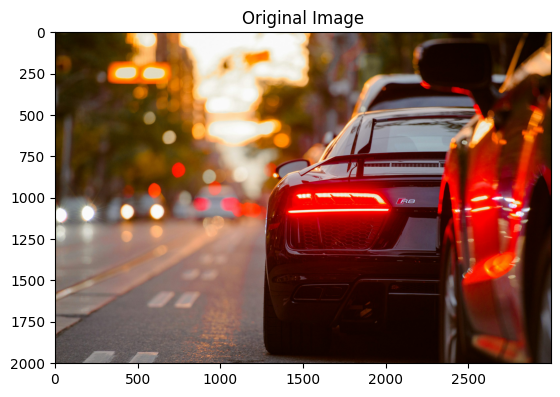

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

In [13]:
height, width, channels = img.shape
print(f"Image Size: {height}x{width}")
print(f"Total Pixels: {height * width}")

Image Size: 2002x3000
Total Pixels: 6006000


In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("rgb_image.jpg", img_rgb)

True

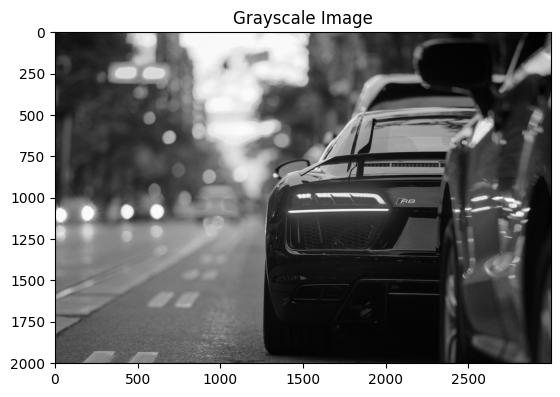

In [15]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite("gray_image.jpg", img_gray)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

In [16]:
img_gray.shape

(2002, 3000)

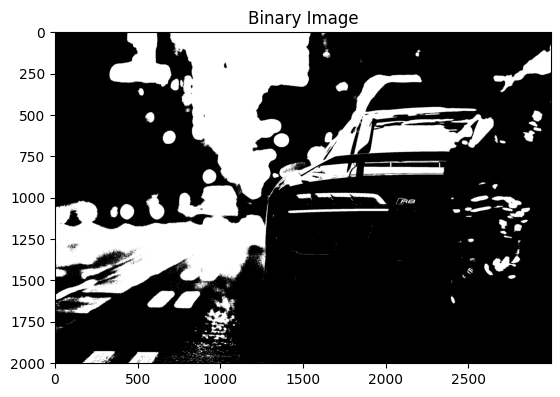

In [17]:
_, img_binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", img_binary)
plt.imshow(img_binary, cmap='gray')
plt.title("Binary Image")
plt.show()

In [18]:
img_binary.shape

(2002, 3000)

In [19]:
black_pixels = np.sum(img_binary == 0)
print(f"Black Pixel Count: {black_pixels}")

Black Pixel Count: 4472189


TASK 2

Sobel Operator

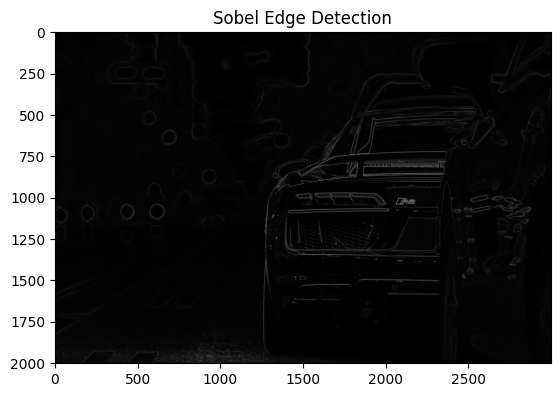

In [21]:
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.hypot(sobelx, sobely)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.show()

Prewitt Operator

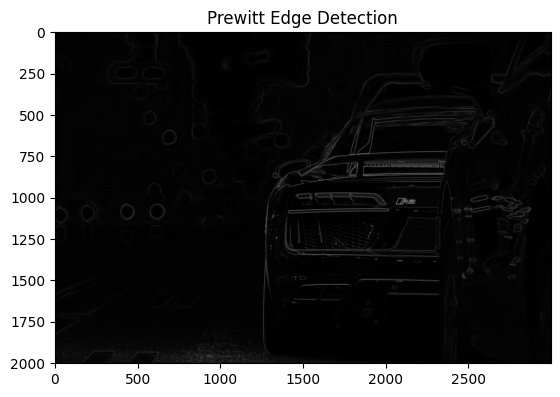

In [22]:
prewitt_edges = prewitt(img_gray)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.show()

Roberts Cross Operator

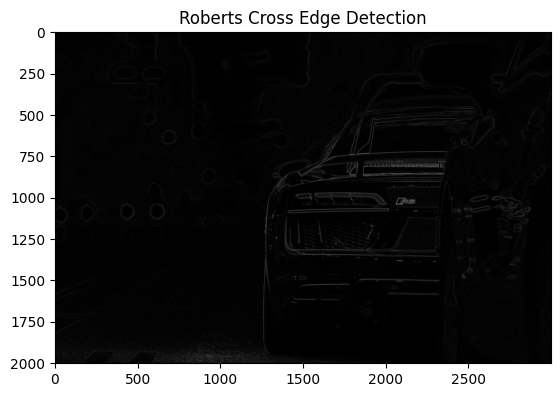

In [23]:
roberts_edges = roberts(img_gray)
plt.imshow(roberts_edges, cmap='gray')
plt.title("Roberts Cross Edge Detection")
plt.show()

Canny Edge Detector

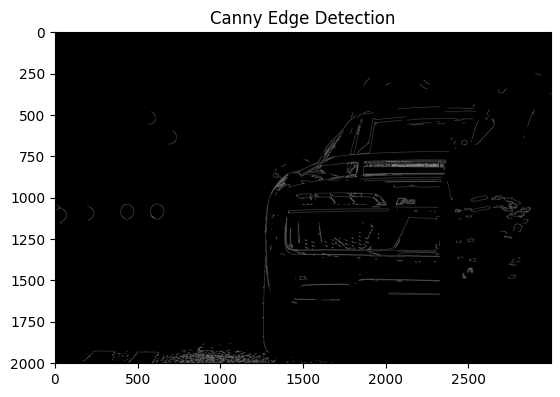

In [24]:
canny_edges = cv2.Canny(img_gray, 100, 200)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

Global Thresholding

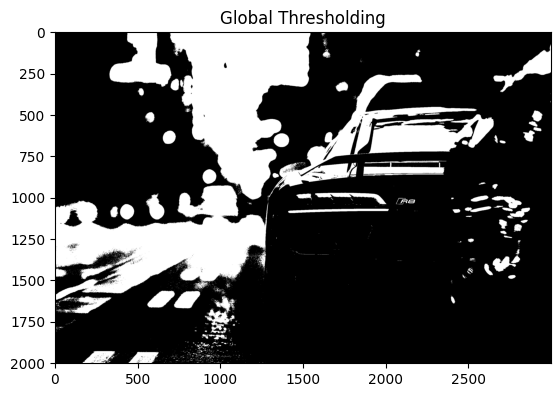

In [25]:
_, global_thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.show()

Adaptive Thresholding

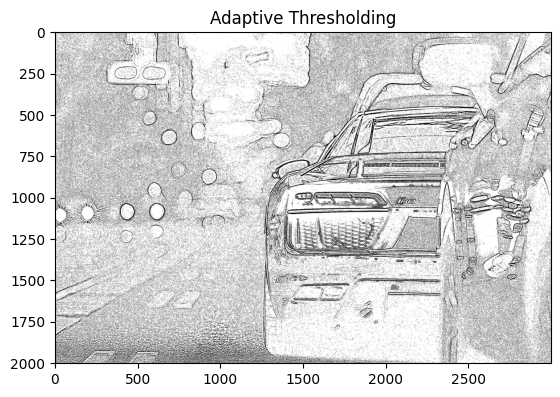

In [26]:
adaptive_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.show()

Edge Detection for Segmentation (Canny)

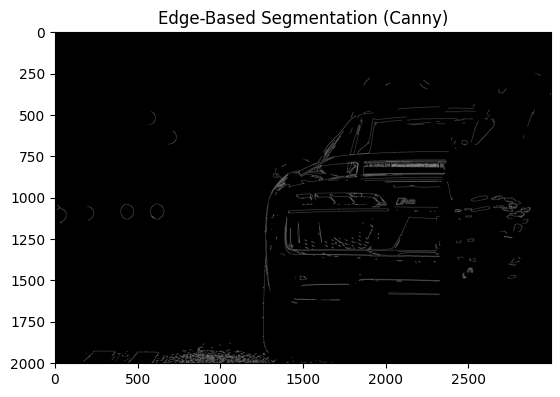

In [27]:
plt.imshow(canny_edges, cmap='gray')
plt.title("Edge-Based Segmentation (Canny)")
plt.show()

Region-Based Segmentation (Watershed)

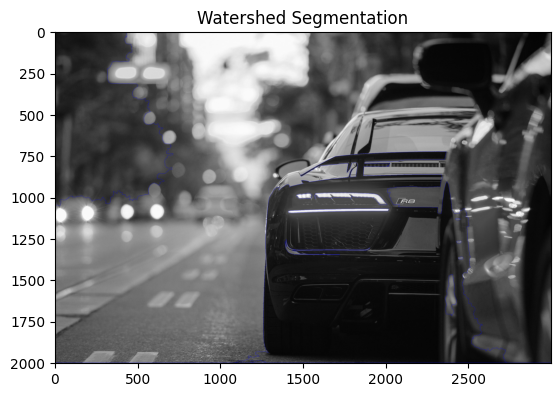

In [29]:
# Convert grayscale to BGR
color_image = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

# Apply Otsu's threshold
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Distance transform for sure foreground
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convert to uint8 and find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(color_image, markers)
color_image[markers == -1] = [255, 0, 0]

# Display the result
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.show()
